## 数据集介绍

这份红酒通用数据集，有1599个样本，12个特征。其中11个为红酒的理化性质，quality列为红酒的品质。本项目的目的是分析不同理化性质与红酒品质之间的关系。

In [2]:
# 导入接下来要使用的python工具包

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 打印数据的精度
pd.options.display.precision=3

# 设置调色板
color = sns.color_palette()

In [5]:
#读取红酒数据集

df = pd.read_csv('/Users/fangcheng/sklearn/项目七：红酒品质预测/winequality-red.csv',sep = ',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5


In [6]:
df.shape

(1596, 12)

## 特征说明

fixed acidity：非挥发性酸
volatile acidity：挥发性酸
citric acid：柠檬酸
residual sugar：残留糖分
chlorides：氯化物
free sulfur dioxide：游离的二氧化硫
total sulfur dioxide：二氧化硫总量
density：密度
PH：酸碱度
sulphates：硫酸盐
alcohol：酒精度
quality：品质

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [8]:
#查看数据的分布

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1596.0,8.314,1.732,4.600,7.100,7.900,9.200,15.600
volatile acidity,1596.0,0.528,0.179,0.120,0.390,0.520,0.640,1.580
citric acid,1596.0,0.270,0.194,0.000,0.090,0.260,0.420,0.790
residual sugar,1596.0,2.536,1.406,0.900,1.900,2.200,2.600,15.500
chlorides,1596.0,0.087,0.045,0.012,0.070,0.079,0.090,0.611
free sulfur dioxide,1596.0,15.858,10.461,1.000,7.000,14.000,21.000,72.000
total sulfur dioxide,1596.0,46.382,32.839,6.000,22.000,38.000,62.000,289.000
density,1596.0,0.997,0.002,0.990,0.996,0.997,0.998,1.004
pH,1596.0,3.312,0.153,2.860,3.210,3.310,3.400,4.010
sulphates,1596.0,0.656,0.163,0.330,0.550,0.620,0.730,1.980


## 单变量分析

Figure 1: Univariate boxplot


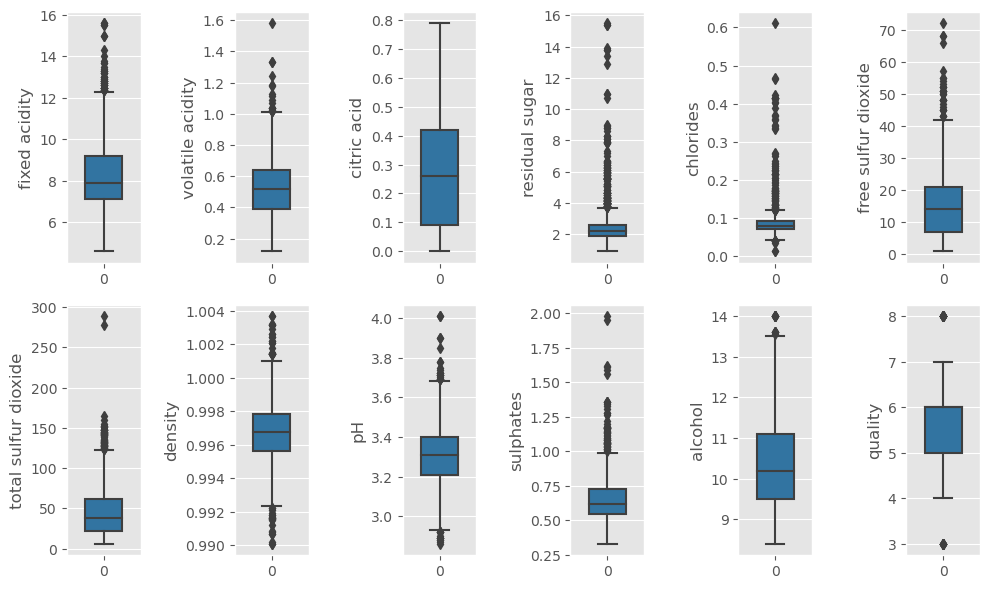

In [9]:
# set plot style

plt.style.use('ggplot')

column = df.columns.tolist()
fig = plt.figure(figsize = (10,6))

for i in range(12):
    plt.subplot(2,6,i+1)
    sns.boxplot(df[column[i]],orient = 'v',width = 0.5,color = color[0])
    plt.ylabel(column[i],fontsize = 12)
    
plt.tight_layout()
print('Figure 1: Univariate boxplot')

Figure 2: Univariate histplot


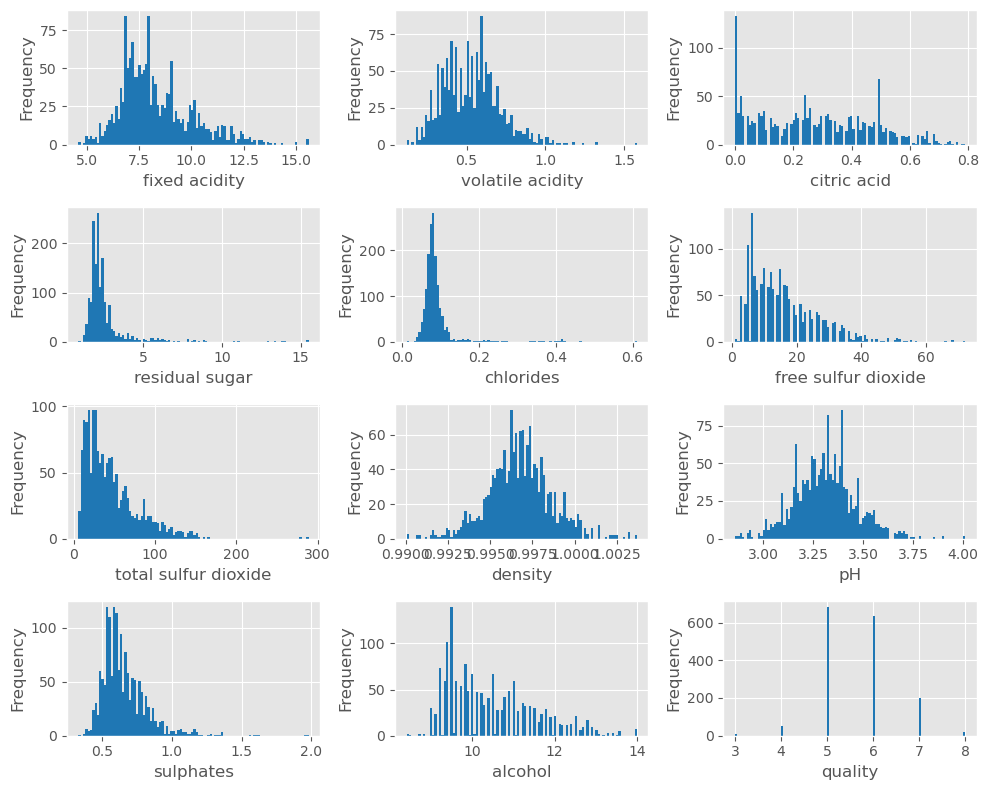

In [10]:
# 单变量的直方图分布

fig = plt.figure(figsize = (10,8))

for i in range(12):
    plt.subplot(4,3,i+1)
    df[column[i]].hist(bins = 100,color = color[0])
    plt.xlabel(column[i],fontsize = 12)
    plt.ylabel('Frequency',fontsize = 12)
    
plt.tight_layout()
print('Figure 2: Univariate histplot')

该数据集研究的是红酒品质与理化性质之间的关系，红酒品质的取值范围为0~10，该数据集的取值范围为3~8。

## 酸性相关的特征分析

该数据集与酸度相关的特征有'fixed acidity', 'volatile acidity', 'citric acid','chlorides', 'free sulfur dioxide', 'total sulfur dioxide','PH'。其中前6中酸度特征都会对PH产生影响。PH在对数尺度，然后对6中酸度取对数做直方图。

Figure 3:Acidity feature in log10 scale


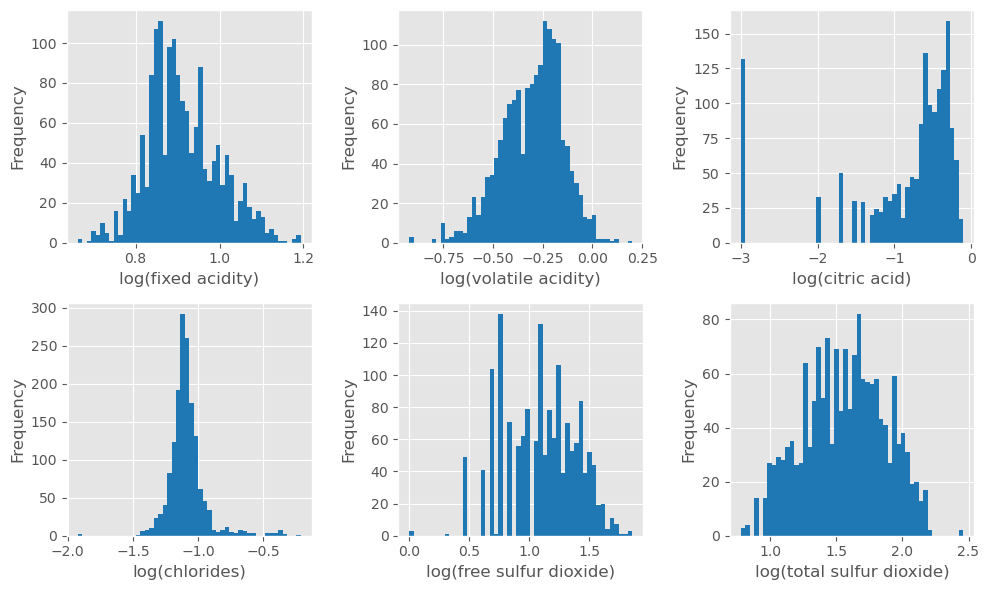

In [11]:
acidityfeat = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',]

fig = plt.figure(figsize = (10,6))

for i in range(6):
    plt.subplot(2,3,i+1)
    v = np.log10(np.clip(df[acidityfeat[i]].values,a_min = 0.001,a_max = None))
    plt.hist(v,bins = 50,color = color[0])
    plt.xlabel('log('+ acidityfeat[i] +')',fontsize = 12)
    plt.ylabel('Frequency')
    
plt.tight_layout()
print('Figure 3:Acidity feature in log10 scale')

Figure 4


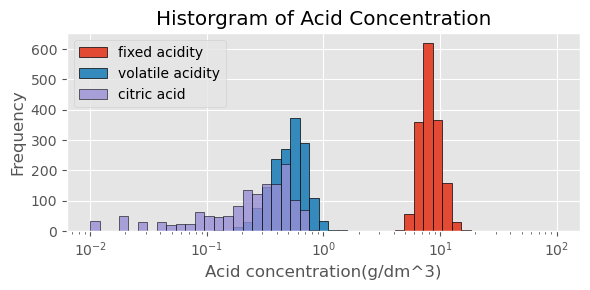

In [12]:
plt.figure(figsize = (6,3))

bins = 10**(np.linspace(-2,2))
plt.hist(df['fixed acidity'],bins = bins, edgecolor = 'k',label = 'fixed acidity')
plt.hist(df['volatile acidity'],bins = bins, edgecolor = 'k',label = 'volatile acidity')
plt.hist(df['citric acid'],bins = bins, alpha = 0.8,edgecolor = 'k',label = 'citric acid')

plt.xscale('log')
plt.xlabel('Acid concentration(g/dm^3)')
plt.ylabel('Frequency')
plt.title('Historgram of Acid Concentration')
plt.legend()
plt.tight_layout()
print('Figure 4')

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1596.0,8.314,1.732,4.600,7.100,7.900,9.200,15.600
volatile acidity,1596.0,0.528,0.179,0.120,0.390,0.520,0.640,1.580
citric acid,1596.0,0.270,0.194,0.000,0.090,0.260,0.420,0.790
residual sugar,1596.0,2.536,1.406,0.900,1.900,2.200,2.600,15.500
chlorides,1596.0,0.087,0.045,0.012,0.070,0.079,0.090,0.611
free sulfur dioxide,1596.0,15.858,10.461,1.000,7.000,14.000,21.000,72.000
total sulfur dioxide,1596.0,46.382,32.839,6.000,22.000,38.000,62.000,289.000
density,1596.0,0.997,0.002,0.990,0.996,0.997,0.998,1.004
pH,1596.0,3.312,0.153,2.860,3.210,3.310,3.400,4.010
sulphates,1596.0,0.656,0.163,0.330,0.550,0.620,0.730,1.980


## 甜度（sweetness）

residual sugar主要与酒的甜度有关，干红（<= 4g/L），半干（4-12g/L），半甜（12-45g/L），甜（>= 45g/L），该数据集中没有甜葡萄酒。

In [14]:
df['sweetness'] = pd.cut(df['residual sugar'],bins = [0,4,12,45],labels = ['dry','semi-dry','semi-sweet'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sweetness
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5,dry
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,dry
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,dry
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry


Figure 5


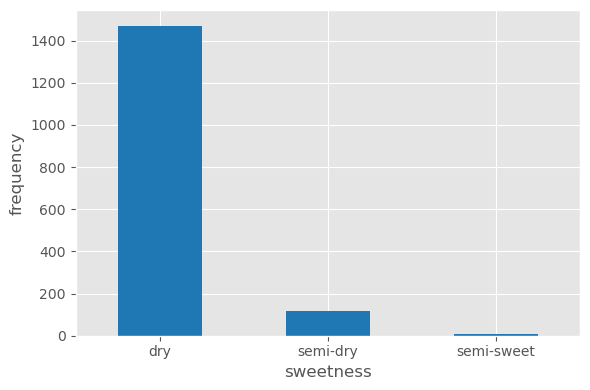

In [15]:
plt.figure(figsize = (6,4))
df['sweetness'].value_counts().plot(kind = 'bar',color = color[0])
plt.xticks(rotation = 0)
plt.xlabel('sweetness')
plt.ylabel('frequency')

plt.tight_layout()
print('Figure 5')

In [16]:
# 创建一个新特征total acid

df['total acid'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']

In [17]:
columns = df.columns.tolist()

In [18]:
columns.remove('sweetness')

In [19]:
columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'total acid']

Figure 7:PhysicoChemico Propertise and Wine Quality by Boxplot


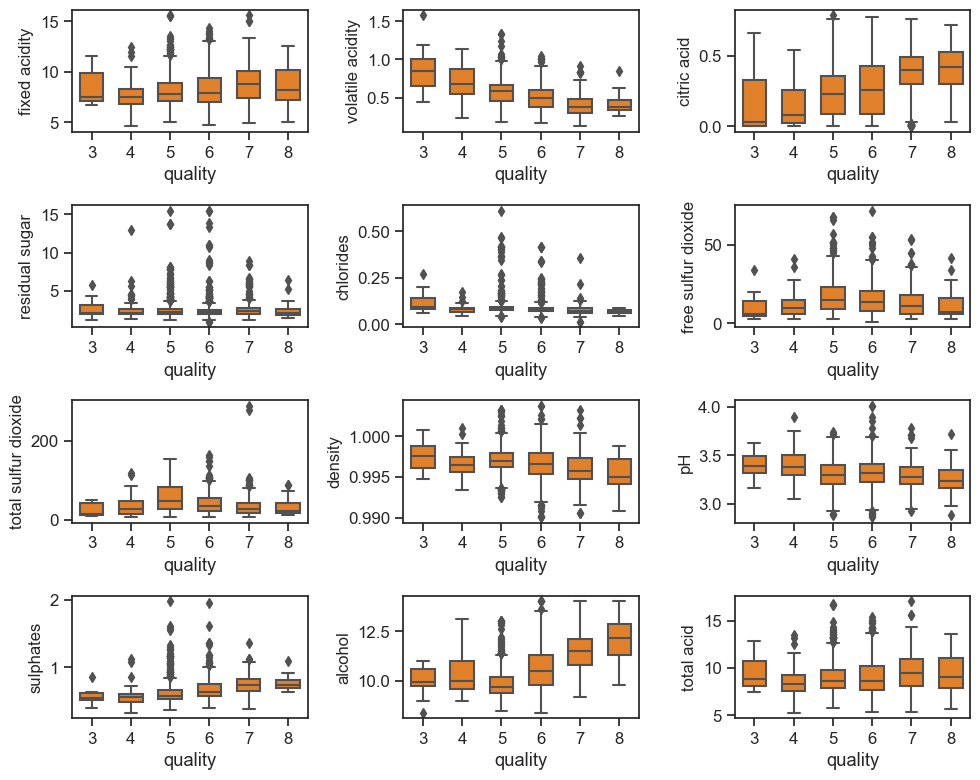

In [20]:
sns.set_style('ticks')
sns.set_context('notebook',font_scale = 1.1)

column = columns[0:11] + ['total acid']


plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(x = 'quality',y = column[i], data = df,color = color[1],width = 0.6)
    plt.ylabel(column[i],fontsize = 12)
plt.tight_layout()

print('Figure 7:PhysicoChemico Propertise and Wine Quality by Boxplot')

## 从上图可以看出：

红酒品质与柠檬酸，硫酸盐，酒精度成正相关
红酒品质与易挥发性酸，密度，PH成负相关
残留糖分，氯离子，二氧化硫对红酒品质没有什么影响

Figure 8:Pairwise colleration plot


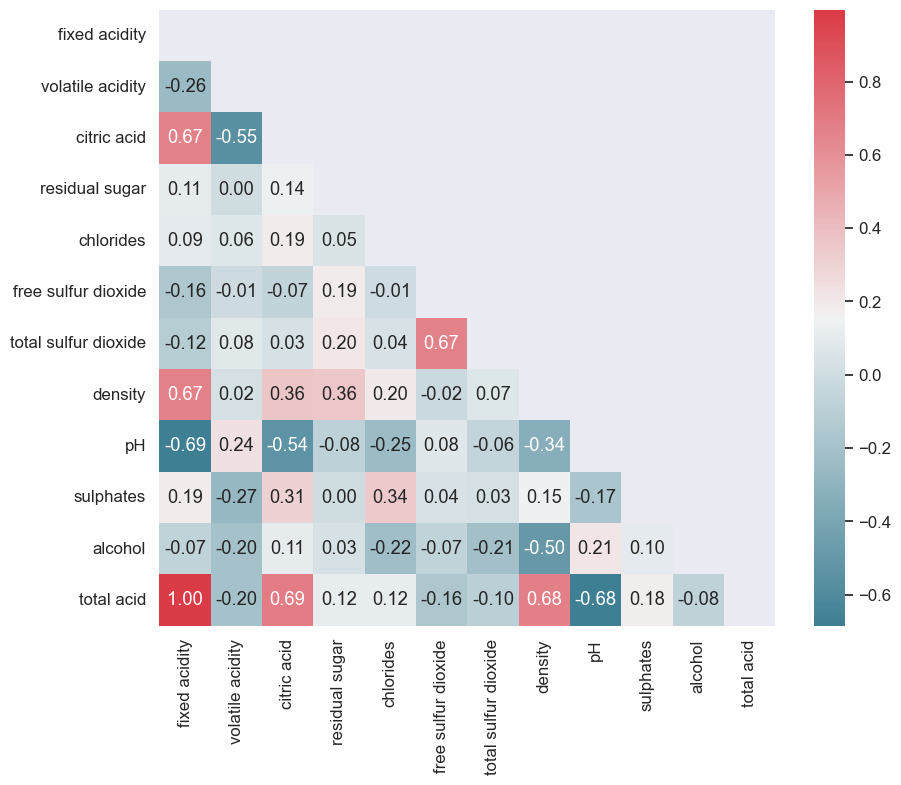

In [22]:
sns.set_style('dark')

plt.figure(figsize = (10,8))

mcorr = df[column].corr()
mask = np.zeros_like(mcorr,dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')

print('Figure 8:Pairwise colleration plot')

## 密度和酒精浓度

密度和酒精浓度是相关的，物理上，但两者并不是线性关系。另外密度还与酒精中的其中物质含量有关，但是相关性很小。

Figure 9: Density vs Alcohol


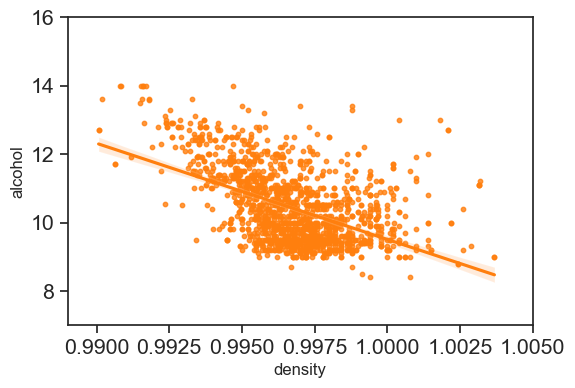

In [23]:
sns.set_style('ticks')
sns.set_context('notebook',font_scale = 1.4)

plt.figure(figsize = (6,4))
sns.regplot(x = 'density',y = 'alcohol',data = df,scatter_kws = {'s':10},color = color[1])
plt.xlabel('density',fontsize = 12)
plt.ylabel('alcohol',fontsize = 12)

plt.xlim(0.989,1.005)
plt.ylim(7,16)

print('Figure 9: Density vs Alcohol')

## 酸性物质含量和PH

因为PH和非挥发性酸之间存在着-0.68的相关性，因为非挥发性酸的总量特别高，所以total acid这个指标意义不大。

In [24]:
column

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'total acid']

Figure 10:The correlation between different acid and PH


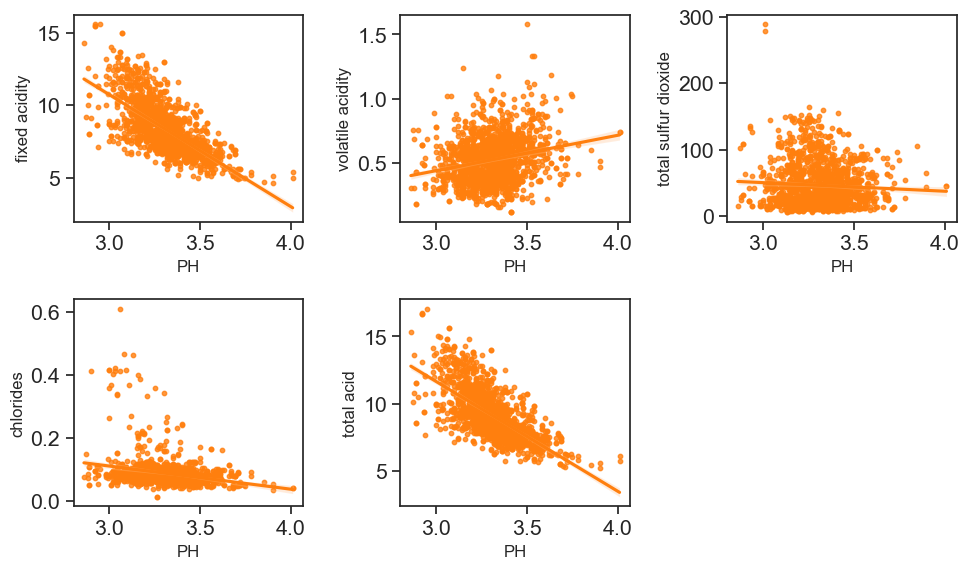

In [25]:
acidity_raleted = ['fixed acidity','volatile acidity','total sulfur dioxide','chlorides','total acid']

plt.figure(figsize = (10,6))

for i in range(5):
    plt.subplot(2,3,i+1)
    sns.regplot(x = 'pH',y = acidity_raleted[i],data = df,scatter_kws = {'s':10},color = color[1])
    plt.xlabel('PH',fontsize = 12)
    plt.ylabel(acidity_raleted[i],fontsize = 12)
    
plt.tight_layout()
print('Figure 10:The correlation between different acid and PH')

## 多变量分析

与红酒品质相关性最高的三个特征分别是酒精浓度，挥发性酸含量，柠檬酸。下面研究三个特征对红酒的品质有何影响。

Figure 11-1:scatter plot between alcohol and volatile acidity and quality


<Figure size 600x400 with 0 Axes>

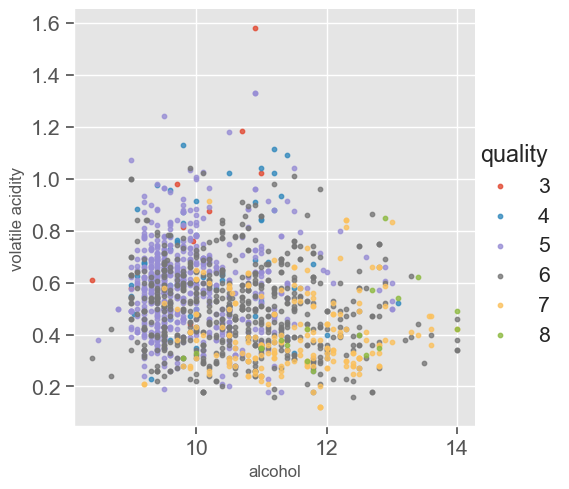

In [28]:
plt.style.use('ggplot')

plt.figure(figsize = (6,4))
sns.lmplot(x = 'alcohol',y = 'volatile acidity',hue = 'quality',data = df,fit_reg = False,scatter_kws = {'s':10},height=5)
print('Figure 11-1:scatter plot between alcohol and volatile acidity and quality')

Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality


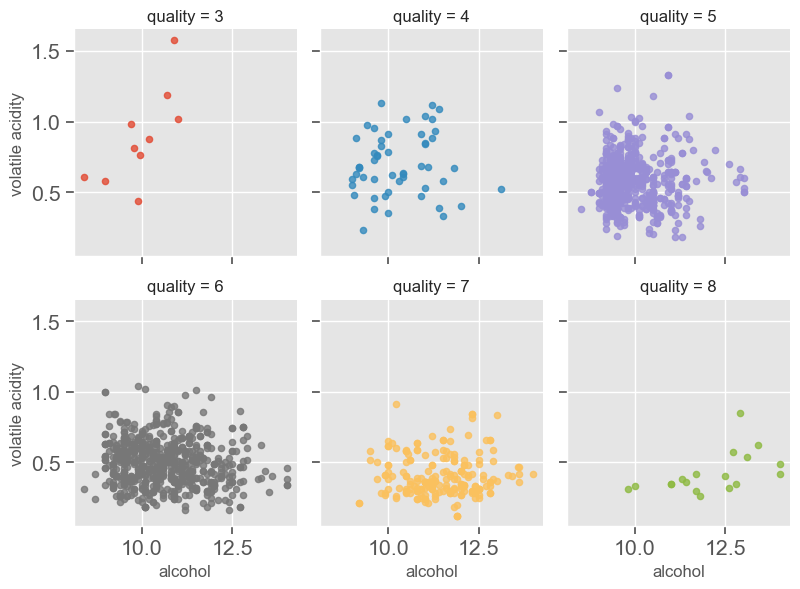

In [29]:
sns.lmplot(x = 'alcohol', y = 'volatile acidity', col='quality', hue = 'quality', 
           data = df,fit_reg = False, height = 3,  aspect = 0.9, col_wrap=3,
           scatter_kws={'s':20})
print("Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality")

## PH和非挥发性酸，柠檬酸

PH和非挥发性酸，柠檬酸成负相关。

Figure 12: pH with Fixed Acidity and Citric Acid


/var/folders/fg/890mwb7d5wx3h5l1kf5g_ypm0000gn/T/ipykernel_1920/790623126.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdBu')


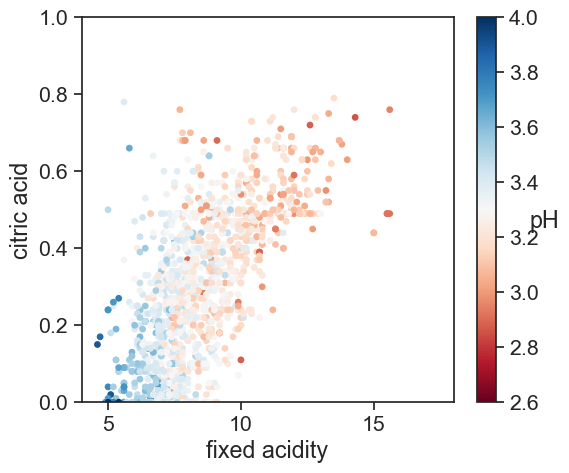

In [30]:
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

plt.figure(figsize=(6,5))
cm = plt.cm.get_cmap('RdBu')
sc = plt.scatter(df['fixed acidity'], df['citric acid'], c=df['pH'], vmin=2.6, vmax=4, s=15, cmap=cm)
bar = plt.colorbar(sc)
bar.set_label('pH', rotation = 0)
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.xlim(4,18)
plt.ylim(0,1)
print('Figure 12: pH with Fixed Acidity and Citric Acid')

## 总结

对于红酒品质影响最重要的三个特征：酒精度、挥发性酸含量和柠檬酸。对于品质高于7的优质红酒和品质低于4的劣质红酒，直观上线性可分，对于品质为5和6的红酒很难进行线性区分。

## 数据建模

线性回归
集成算法
提升算法
模型评估
确定模型参数

#### 1.数据集切分

1.1 切分特征和标签

1.2 切分训练集个测试集

In [31]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sweetness,total acid
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5,dry,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,dry,8.60
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,dry,12.04
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry,8.10


In [32]:
# 数据预处理工作

# 检查数据的完整性
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
sweetness               0
total acid              0
dtype: int64

In [33]:
# 将object类型的数据转化为int类型

sweetness = pd.get_dummies(df['sweetness'])

df = pd.concat([df,sweetness],axis = 1)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sweetness,total acid,dry,semi-dry,semi-sweet
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry,8.10,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5,dry,8.68,1,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,dry,8.60,1,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,dry,12.04,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry,8.10,1,0,0


In [34]:
df = df.drop('sweetness',axis = 1)

In [35]:
labels = df['quality']
features = df.drop('quality',axis = 1)

In [50]:
# 对原始数据集进行切分
from sklearn.model_selection import train_test_split

train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size = 0.3,random_state = 0)

print('训练特征的规模:',train_features.shape)
print('训练标签的规模:',train_labels.shape)
print('测试特征的规模:',test_features.shape)
print('测试标签的规模:',test_labels.shape)

训练特征的规模: (1117, 15)
训练标签的规模: (1117,)
测试特征的规模: (479, 15)
测试标签的规模: (479,)


In [51]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(train_features,train_labels)

LinearRegression()

In [52]:
prediction = LR.predict(test_features)
prediction[:5]

array([6.45830662, 5.64493262, 6.6371206 , 5.86838664, 5.30365441])

In [53]:
#对模型进行评估
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(test_labels,prediction))

print('线性回归模型的预测误差:',RMSE)

线性回归模型的预测误差: 0.6607439448125236


In [54]:
# 对训练特征和测试特征做标准化处理，观察结果

from sklearn.preprocessing import StandardScaler

train_features_std = StandardScaler().fit_transform(train_features)
test_features_std = StandardScaler().fit_transform(test_features)


LR = LinearRegression()
LR.fit(train_features_std,train_labels)
prediction = LR.predict(test_features_std)

In [55]:
#观察预测结果误差

RMSE = np.sqrt(mean_squared_error(prediction,test_labels))

print('线性回归模型预测误差:',RMSE)

线性回归模型预测误差: 344496114789.38855


## 集成算法：随机森林模型

In [58]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(train_features,train_labels)

prediction = RF.predict(test_features)

RMSE = np.sqrt(mean_squared_error(prediction,test_labels))
print('随机森林模型的预测误差:',RMSE)

随机森林模型的预测误差: 0.5895398226627436


In [59]:
RF.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [60]:
# 网格搜索
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[100,200,300,400,500],
             'max_depth':[3,4,5,6],
             'min_samples_split':[2,3,4]}

RF = RandomForestRegressor()

grid = GridSearchCV(RF,param_grid = param_grid,scoring = 'neg_mean_squared_error',cv = 3,n_jobs = -1)
grid.fit(train_features,train_labels)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [61]:
grid.best_params_

{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 200}

In [62]:
RF = RandomForestRegressor(n_estimators = 300,min_samples_split = 2,max_depth = 6)

RF.fit(train_features,train_labels)

RandomForestRegressor(max_depth=6, n_estimators=300)

In [63]:
prediction = RF.predict(test_features)

RF_RMSE = np.sqrt(mean_squared_error(prediction,test_labels))
print('随机森林模型的预测误差:',RF_RMSE)

随机森林模型的预测误差: 0.6181866942941027


## 集成算法GBDT

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

GBDT = GradientBoostingRegressor()
GBDT.fit(train_features,train_labels)

gbdt_prediction = GBDT.predict(test_features)
gbdt_RMSE = np.sqrt(mean_squared_error(gbdt_prediction,test_labels))

print('GBDT模型的预测误差:',gbdt_RMSE)

GBDT模型的预测误差: 0.6178781357841077


In [65]:
GBDT.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor()>

### 随机参数搜索模型 RandomizedSearchCV

In [66]:
from sklearn.model_selection import RandomizedSearchCV

GBDT = GradientBoostingRegressor()

#设置GBDT算法的部分参数
learning_rate = [0.01,0.1,1,10]
max_depth = [3,4,5,6]
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]
n_estimators = [int(x) for x in range(100,600,100)]

random_params_group = {'learning_rate':learning_rate,
                      'max_depth':max_depth,
                      'min_samples_leaf':min_samples_leaf,
                      'min_samples_split':min_samples_split,
                      'n_estimators':n_estimators}

random_model = RandomizedSearchCV(GBDT,param_distributions = random_params_group,n_iter = 100,
                                 scoring = 'neg_mean_squared_error',verbose = 2,n_jobs = -1,cv = 3,random_state = 0)

In [67]:
train_features.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,total acid,dry,semi-dry,semi-sweet
count,1117.000,1117.000,1117.000,1117.000,1117.000,1117.000,1117.000,1117.000,1117.000,1117.000,1117.000,1117.000,1117.000,1117.000,1117.000
mean,8.307,0.530,0.268,2.554,0.088,16.142,46.779,0.997,3.315,0.658,10.408,9.105,0.919,0.073,0.007
std,1.708,0.183,0.194,1.511,0.046,10.699,32.660,0.002,0.152,0.166,1.047,1.795,0.272,0.261,0.084
min,4.700,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.870,0.330,8.400,5.390,0.000,0.000,0.000
25%,7.100,0.390,0.090,1.900,0.070,8.000,23.000,0.996,3.210,0.550,9.500,7.830,1.000,0.000,0.000
50%,7.900,0.520,0.250,2.200,0.080,14.000,38.000,0.997,3.310,0.620,10.100,8.680,1.000,0.000,0.000
75%,9.200,0.640,0.420,2.600,0.091,22.000,63.000,0.998,3.400,0.730,11.000,10.050,1.000,0.000,0.000
max,15.600,1.580,0.790,15.500,0.611,72.000,278.000,1.004,4.010,1.980,14.000,16.735,1.000,1.000,1.000


In [68]:
train_features = train_features.drop(['dry','semi-dry','semi-sweet'],axis = 1)

In [69]:
train_features.shape

(1117, 12)